In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on AF1
use_AF1 = []
for k in range (len(data)):
    if data['home_team'][k] == 'AF1' and data['away_team'][k] not in ['AF1', 'AF2', 'AF3']:
        use_AF1.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'AF1' and data['home_team'][g] not in ['AF1', 'AF2', 'AF3']:
        use_AF1.append(g)
data_af1 = data.filter(items = use_AF1, axis = 0)
data_af1 = data_af1.replace(to_replace = r'^AS.$', value = 'Asia', regex = True)
data_af1 = data_af1.replace(to_replace = r'^SA.$', value = 'South_America', regex = True)
data_af1 = data_af1.replace(to_replace = r'^NA.$', value = 'North_America', regex = True)
data_af1 = data_af1.replace(to_replace = r'^EU.$', value = 'Europe', regex = True)
print(data_af1)

            date      home_team away_team  year  home  away  goal_margin
1617  1960-06-05            AF1      Asia  1960     1    -1            1
1709  1961-11-12            AF1    Europe  1961    -1     1            1
1726  1962-04-15            AF1    Europe  1962    -1     1            2
1775  1963-01-13            AF1    Europe  1963     1    -1            1
1842  1963-12-29            AF1    Europe  1963    -1     1            3
...          ...            ...       ...   ...   ...   ...          ...
8566  2019-09-10         Europe       AF1  2019     0     0            0
8571  2019-10-10  South_America       AF1  2019     0     0            0
8577  2019-10-13  South_America       AF1  2019     0     0            0
8638  2020-10-13  North_America       AF1  2020     0     0            0
8746  2021-07-03  North_America       AF1  2021     1    -1            4

[275 rows x 7 columns]


In [4]:
af = []
opponent = []
match_status = []
for x in range (len(data_af1)):
    af.append('AF1')
    if np.array(data_af1['home_team'])[x] == 'AF1':
        opponent.append(np.array(data_af1['away_team'])[x])
        match_status.append(np.array(data_af1['home'])[x])
    else:
        opponent.append(np.array(data_af1['home_team'])[x])
        match_status.append(np.array(data_af1['away'])[x])
        
af1 = pd.DataFrame(data = {'africa_tier1' : af, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_af1['goal_margin']), 'year' : np.array(data_af1['year'])})

print(af1)

    africa_tier1       opponent  match_status  goal_margin  year
0            AF1           Asia             1            1  1960
1            AF1         Europe            -1            1  1961
2            AF1         Europe            -1            2  1962
3            AF1         Europe             1            1  1963
4            AF1         Europe            -1            3  1963
..           ...            ...           ...          ...   ...
270          AF1         Europe             0            0  2019
271          AF1  South_America             0            0  2019
272          AF1  South_America             0            0  2019
273          AF1  North_America             0            0  2020
274          AF1  North_America            -1            4  2021

[275 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
af1_asia = []
af1_north_america =[]
af1_south_america =[]
af1_europe = []

for y in range (len(af1)):
    if opponent[y] == 'Asia':
        af1_asia.append(y)
    elif opponent[y] == 'North_America':
        af1_north_america.append(y)
    elif opponent[y] == 'South_America':
        af1_south_america.append(y)
    if opponent[y] == 'Europe':
        af1_europe.append(y)
#verifying
print(len(af1_europe) + len(af1_asia) + len(af1_south_america) + len(af1_north_america) )

275


In [6]:
#af1_vs_asia 
af1_vs_asia = af1.filter(items = af1_asia, axis = 0)

#af1_vs_north_america 
af1_vs_north_america = af1.filter(items = af1_north_america, axis = 0)

#af1_vs_south_america 
af1_vs_south_america = af1.filter(items = af1_south_america, axis = 0)

#af1_vs_europe 
af1_vs_europe = af1.filter(items = af1_europe, axis = 0)

af1_vs_asia.to_excel("Af_Tier1_vs_Asia.xlsx", index = False)
af1_vs_north_america.to_excel("Af_Tier1_vs_North_America.xlsx", index = False)
af1_vs_south_america.to_excel("Af_Tier1_vs_South_America.xlsx", index = False)
af1_vs_europe.to_excel("Af_Tier1_vs_Europe.xlsx", index = False)

    africa_tier1 opponent  match_status  goal_margin  year
0            AF1     Asia             1            1  1960
8            AF1     Asia             1            3  1972
11           AF1     Asia             1            2  1973
12           AF1     Asia             0            0  1973
13           AF1     Asia             0            0  1973
..           ...      ...           ...          ...   ...
248          AF1     Asia             0            0  2014
252          AF1     Asia            -1            1  2015
253          AF1     Asia            -1            2  2015
265          AF1     Asia             0            0  2018
268          AF1     Asia             1            1  2018

[98 rows x 5 columns]


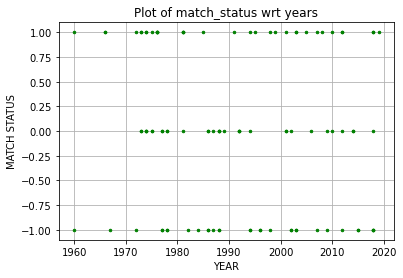

Text(0.5, 1.0, 'Histogram of match_status')

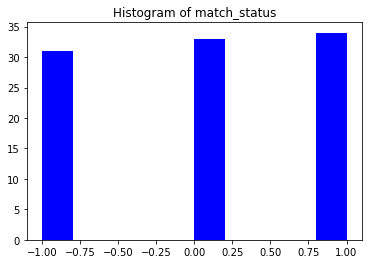

In [7]:
#checking
print(af1_vs_asia)

#plot af1_vs_asia
plt.plot(af1_vs_asia['year'], af1_vs_asia['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(af1_vs_asia['match_status'], color = 'blue')
plt.title('Histogram of match_status')